In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)

df_test = pd.read_csv('test.csv')
print(df_test.shape)

(31962, 3)
(17197, 2)


In [3]:
df_train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Initial data cleaning requirements that we can think of after looking at the top 5 records:

1. The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
2. We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
3. Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
4. Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.
5. In the 4th tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information.

In [4]:
total_df = df_train.append(df_test, ignore_index=True)
total_df.shape

/Users/praveen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(49159, 3)

In [5]:
def remove_pattern(input_string, pattern):
    r = re.findall(pattern,input_string)
    for i in r:
        input_string = re.sub(i,'',input_string)
    return input_string

In [6]:
# remove twitter handles (@user)
total_df['cleaned_tweet'] = np.vectorize(remove_pattern)(total_df['tweet'],"@[\w]*")

In [7]:
total_df.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# remove special characters, numbers, punctuations
total_df['cleaned_tweet'] = total_df['cleaned_tweet'].str.replace("[^a-zA-Z#]",' ')
total_df.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
#Removing words with less than or equal to 3 characters assuming they does not impact much on dependent variable
total_df['cleaned_tweet'] = total_df['cleaned_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))
total_df.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


You can see the difference between the raw tweets and the cleaned tweets quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

In [10]:
#Tokenization

tokenized_tweet = total_df['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: cleaned_tweet, dtype: object

In [11]:
# Stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x : [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: cleaned_tweet, dtype: object

In [12]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

total_df['cleaned_tweet'] = tokenized_tweet

total_df.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

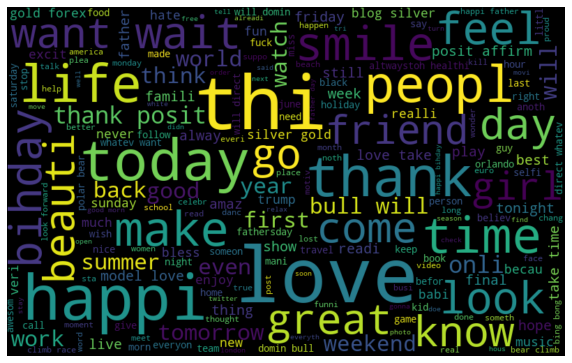

In [13]:
all_words = ' '.join([text for text in total_df['cleaned_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

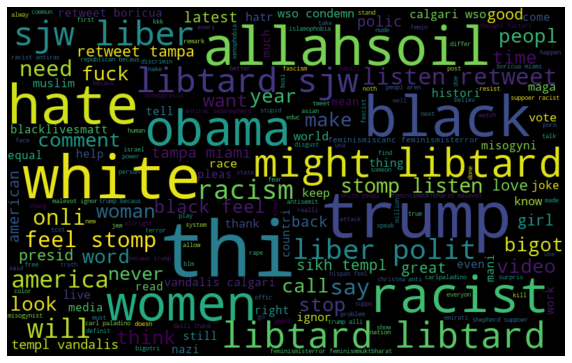

In [14]:
negative_words = ' '.join([text for text in total_df['cleaned_tweet'][total_df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#function to collect hashtags
def extract_hashtags(input_string):
    hashtags = []
    for i in input_string:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [16]:
HT_regular = extract_hashtags(total_df['cleaned_tweet'][total_df['label'] == 0])

HT_negative = extract_hashtags(total_df['cleaned_tweet'][total_df['label'] == 1])


HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

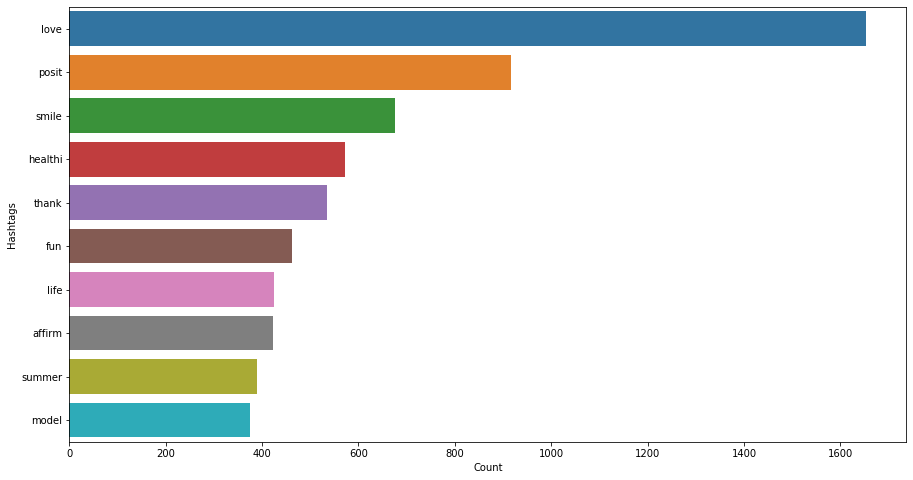

In [17]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtags': list(a.keys()),
                 'Count':list(a.values())})
#d.sort_values('Count',ascending=False)
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
ax = sns.barplot(data=d, x='Count',y='Hashtags')
#ax.set(xlabel='Count')
plt.show()

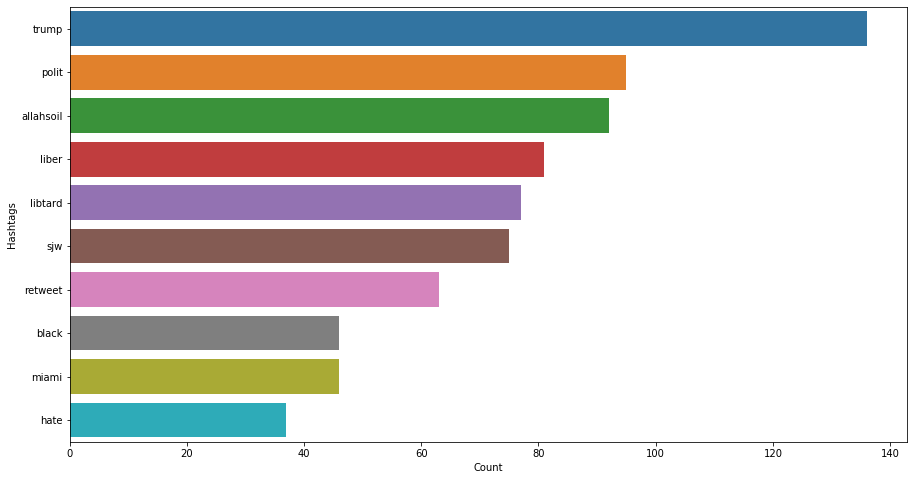

In [18]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtags': list(a.keys()),
                 'Count':list(a.values())})
#d.sort_values('Count',ascending=False)
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
ax = sns.barplot(data=d, x='Count',y='Hashtags')
#ax.set(xlabel='Count')
plt.show()

In [19]:
#Bag of words

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 10000, stop_words='english')
bow = bow_vectorizer.fit_transform(total_df['cleaned_tweet'])

bow

<49159x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 274807 stored elements in Compressed Sparse Row format>

In [20]:
# TF-IDF
# TF = (Number of times term t appears in a document)/(Number of terms in the document)
# IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
# TF-IDF = TF*IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
tfidf_vec = tfidf_vectorizer.fit_transform(total_df['cleaned_tweet'])

tfidf_vec

<49159x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 274807 stored elements in Compressed Sparse Row format>

In [21]:
#Model building with bow 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

X_train, X_test, y_train, y_test = train_test_split(train_bow, df_train['label'],test_size=0.30, random_state=21)

LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

prediction = LR_model.predict_proba(X_test)
#print(prediction)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

score = f1_score(y_test, prediction_int)
print(score)

0.6661379857256147


/Users/praveen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
#Building model with tfidf

train_tfidf = tfidf_vec[:31962,:]
test_tfidf = tfidf_vec[31962:,:]

#print(train_tfidf.shape)
#print(df_train.shape)
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df_train['label'], test_size=0.3, random_state=21)

LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

prediction = LR_model.predict_proba(X_test)
#print(prediction)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

score = f1_score(y_test, prediction_int)
print(score)


0.6000000000000001


In [27]:
test_pred = LR_model.predict_proba(test_bow)
test_pred_int = test_pred[:,1]>= 0.3
test_pred_int = test_pred_int.astype(np.int)

df_test['label'] = test_pred_int

submission = df_test[['id','label']]
submission.to_csv('submission.csv',index=False)

In [25]:
test_pred = LR_model.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1]>= 0.3
test_pred_int = test_pred_int.astype(np.int)

df_test['label'] = test_pred_int

submission = df_test[['id','label']]
submission.to_csv('submission.csv',index=False)